# Advanced Machine Learning

### Assigment #7 - Time Series

**Team:**
    João Raimundo (57454), Rui Roque (57588)

### Import Libraries

In [323]:
import math
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from math import sqrt
import matplotlib.pyplot as plt

# tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model



## 1. Problem 1

### Creation of a time series for problem 1:

In [324]:
lag = 12
points = np.linspace(0, 2*math.pi*100, 50*100)
sin = np.sin(points)

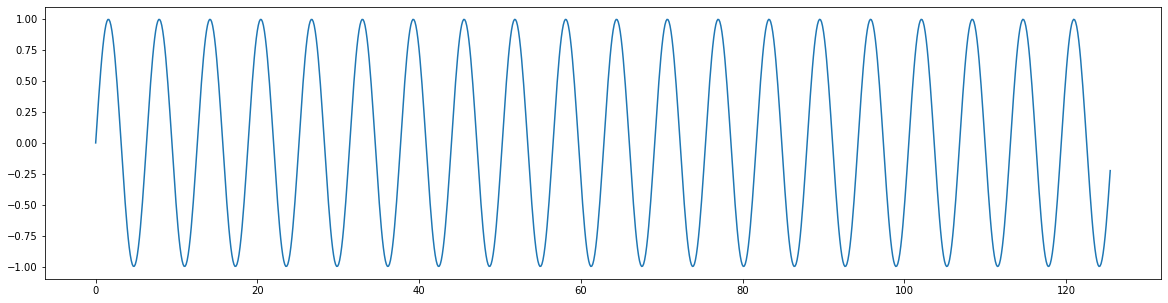

In [325]:
fig = plt.figure(figsize=(20,5))


# plot the function - first 
plt.plot(points[0:999], sin[0:999])
plt.show()

In [326]:
X = []
y = []

for i in range(lag, 4999):
   X.append(sin[i-lag:i])
   y.append(sin[i])

X = np.expand_dims(X, axis = 2)
y = np.array(y)

Split Data:

In [327]:
X_train_1 = X[:2400]
y_train_1 = y[:2400]
X_test_1  = X[2401:2501]
y_test_1  = y[2401:2501]

X_train_2 = X[2401:4900]
y_train_2 = y[2401:4900]
X_test_2  = X[4901:-1]
y_test_2  = y[4901:-1]

print("Shape of sets: \n")
print("--> First Train and Test sets:")
print("X_train_1: ", X_train_1.shape)
print("y_train_1: ", y_train_1.shape)
print("X_test_1: ", X_test_1.shape)
print("y_test_1: ", y_test_1.shape,"\n")

print("--> Second Train and Test sets:")
print("X_train_2: ", X_train_2.shape)
print("y_train_2: ", y_train_2.shape)
print("X_test_2: ", X_test_2.shape)
print("y_test_2: ", y_test_2.shape)

Shape of sets: 

--> First Train and Test sets:
X_train_1:  (2400, 12, 1)
y_train_1:  (2400,)
X_test_1:  (100, 12, 1)
y_test_1:  (100,) 

--> Second Train and Test sets:
X_train_2:  (2499, 12, 1)
y_train_2:  (2499,)
X_test_2:  (85, 12, 1)
y_test_2:  (85,)


### LSTM Model (Long short-term memory):

In [328]:
def lstm(X_train, y_train, X_test, y_test, epochs, noise = False):
    if(noise == False):
        lstm_model = Sequential([
        layers.LSTM(12, return_sequences=True),
        layers.Dropout(0.2),
        layers.LSTM(12, return_sequences=True),
        layers.Dropout(0.2),
        layers.LSTM(12),
        layers.Dropout(0.2),
        layers.Dense(1)
        ])
    else:
        lstm_model = Sequential([
        layers.GaussianNoise(0.05),
        layers.LSTM(12, return_sequences=True),
        layers.Dropout(0.2),
        layers.LSTM(12, return_sequences=True),
        layers.Dropout(0.2),
        layers.LSTM(12),
        layers.Dropout(0.2),
        layers.Dense(1)
        ])    


    # compile
    lstm_model.compile(optimizer = 'adam', loss = keras.losses.MeanSquaredError(), metrics=[tf.metrics.MeanAbsoluteError()])

    print("LSTM Model contructed with 3 hidden layers of 12 neurons:\n")

    # Fitting the RNN to the Training set
    print("Currently fitting the model with the training set with", epochs, " epochs:")
    history_lstm = lstm_model.fit(X_train,y_train,epochs = epochs)

    print("\n")

    # plot loss plot
    plt.plot(history_lstm.history['loss'], label="loss")
    plt.legend(loc="upper right")
    plt.title("Loss Plot")
    plt.show()

    # inferring MSE % RMSE
    predictions = lstm_model.predict(X_test)
    test_score = mean_squared_error(y_test, predictions)
    print('LSTM Model Test MSE: %.3f' % test_score)
    print('LSTM Model Test RMSE: %.3f' % sqrt(test_score))

    # plot predictions and expected results
    fig = plt.figure(figsize=(40,10))
    plt.plot(y_train,  label="Train")
    plt.plot([None for i in y_train] + [x for x in y_test], label="Test")
    plt.plot([None for i in y_train] + [x for x in predictions], label="Predicted")
    plt.legend(loc="upper left", prop= {"size": 15}) 
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.title("Train, Test and Predicted Results")
    plt.show()


### Set 1

LSTM Model contructed with 3 hidden layers of 12 neurons:

Currently fitting the model with the training set with 10  epochs:
Epoch 1/10
75/75 [==============================] - 5s 9ms/step - loss: 0.3343 - mean_absolute_error: 0.5182
Epoch 2/10
75/75 [==============================] - 1s 9ms/step - loss: 0.1356 - mean_absolute_error: 0.3033
Epoch 3/10
75/75 [==============================] - 1s 9ms/step - loss: 0.0471 - mean_absolute_error: 0.1734
Epoch 4/10
75/75 [==============================] - 1s 8ms/step - loss: 0.0379 - mean_absolute_error: 0.1550
Epoch 5/10
75/75 [==============================] - 1s 9ms/step - loss: 0.0338 - mean_absolute_error: 0.1447
Epoch 6/10
75/75 [==============================] - 1s 10ms/step - loss: 0.0300 - mean_absolute_error: 0.1368
Epoch 7/10
75/75 [==============================] - 1s 9ms/step - loss: 0.0294 - mean_absolute_error: 0.1351
Epoch 8/10
75/75 [==============================] - 1s 9ms/step - loss: 0.0272 - mean_absolute_error: 0.1307
E

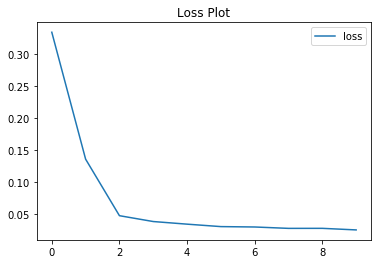

LSTM Model Test MSE: 0.001
LSTM Model Test RMSE: 0.039


/home/redck/.local/lib/python3.8/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


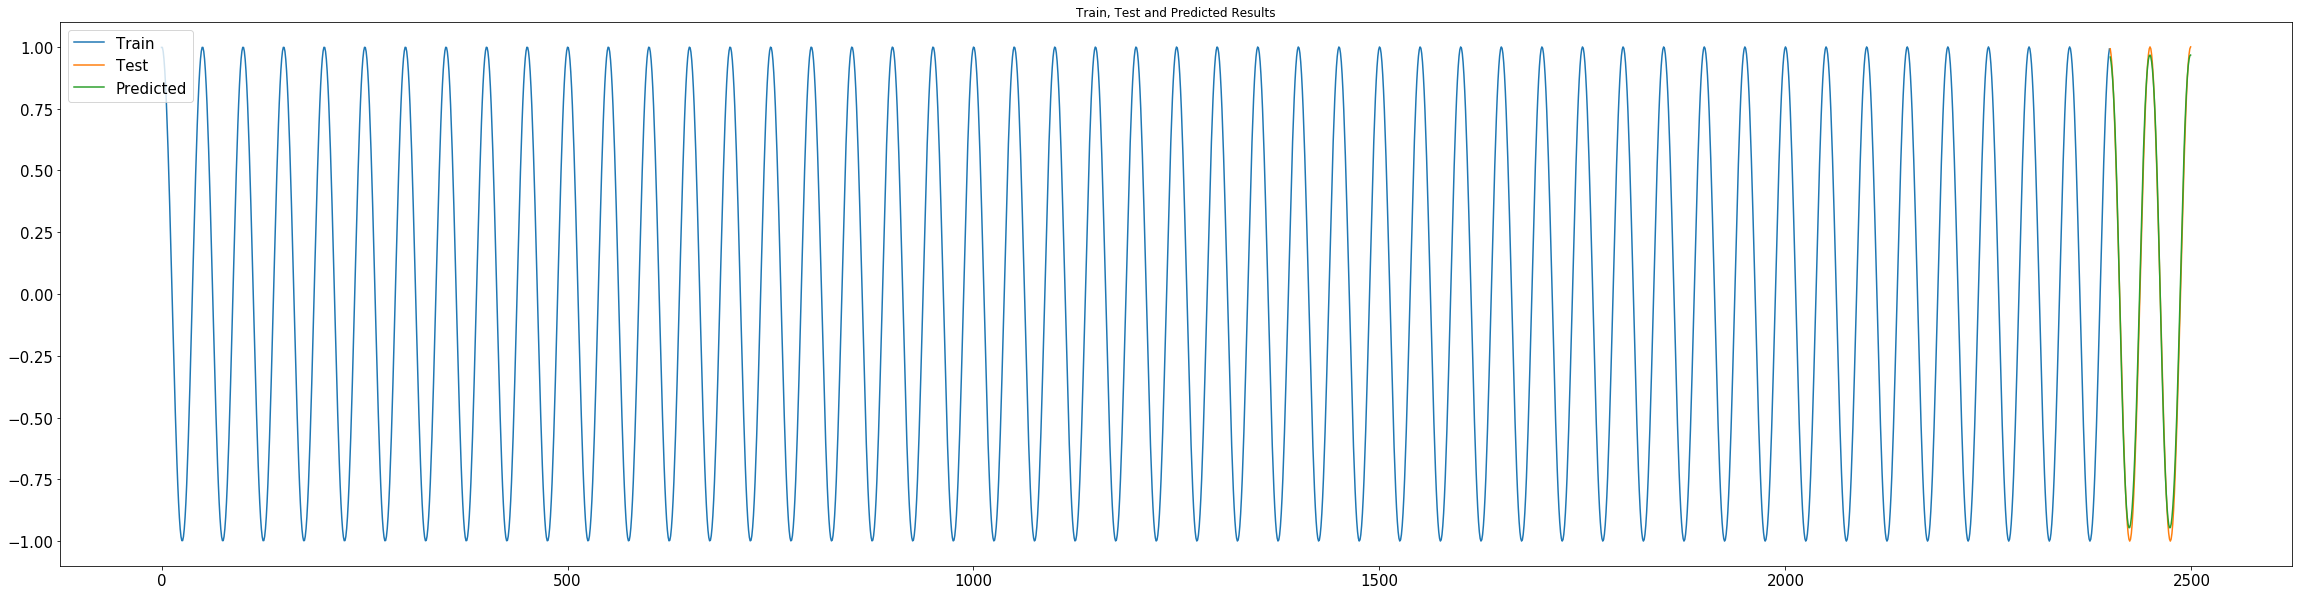

In [329]:
lstm(X_train_1, y_train_1, X_test_1, y_test_1, 10)

### Set 2:

LSTM Model contructed with 3 hidden layers of 12 neurons:

Currently fitting the model with the training set with 10  epochs:
Epoch 1/10
79/79 [==============================] - 5s 13ms/step - loss: 0.3548 - mean_absolute_error: 0.5331
Epoch 2/10
79/79 [==============================] - 1s 13ms/step - loss: 0.1207 - mean_absolute_error: 0.2850
Epoch 3/10
79/79 [==============================] - 1s 12ms/step - loss: 0.0459 - mean_absolute_error: 0.1710
Epoch 4/10
79/79 [==============================] - 1s 11ms/step - loss: 0.0369 - mean_absolute_error: 0.1522
Epoch 5/10
79/79 [==============================] - 1s 11ms/step - loss: 0.0334 - mean_absolute_error: 0.1442
Epoch 6/10
79/79 [==============================] - 1s 14ms/step - loss: 0.0319 - mean_absolute_error: 0.1403
Epoch 7/10
79/79 [==============================] - 1s 13ms/step - loss: 0.0302 - mean_absolute_error: 0.1374
Epoch 8/10
79/79 [==============================] - 1s 13ms/step - loss: 0.0274 - mean_absolute_error: 0

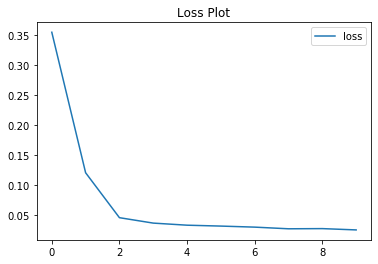

LSTM Model Test MSE: 0.002
LSTM Model Test RMSE: 0.041


/home/redck/.local/lib/python3.8/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


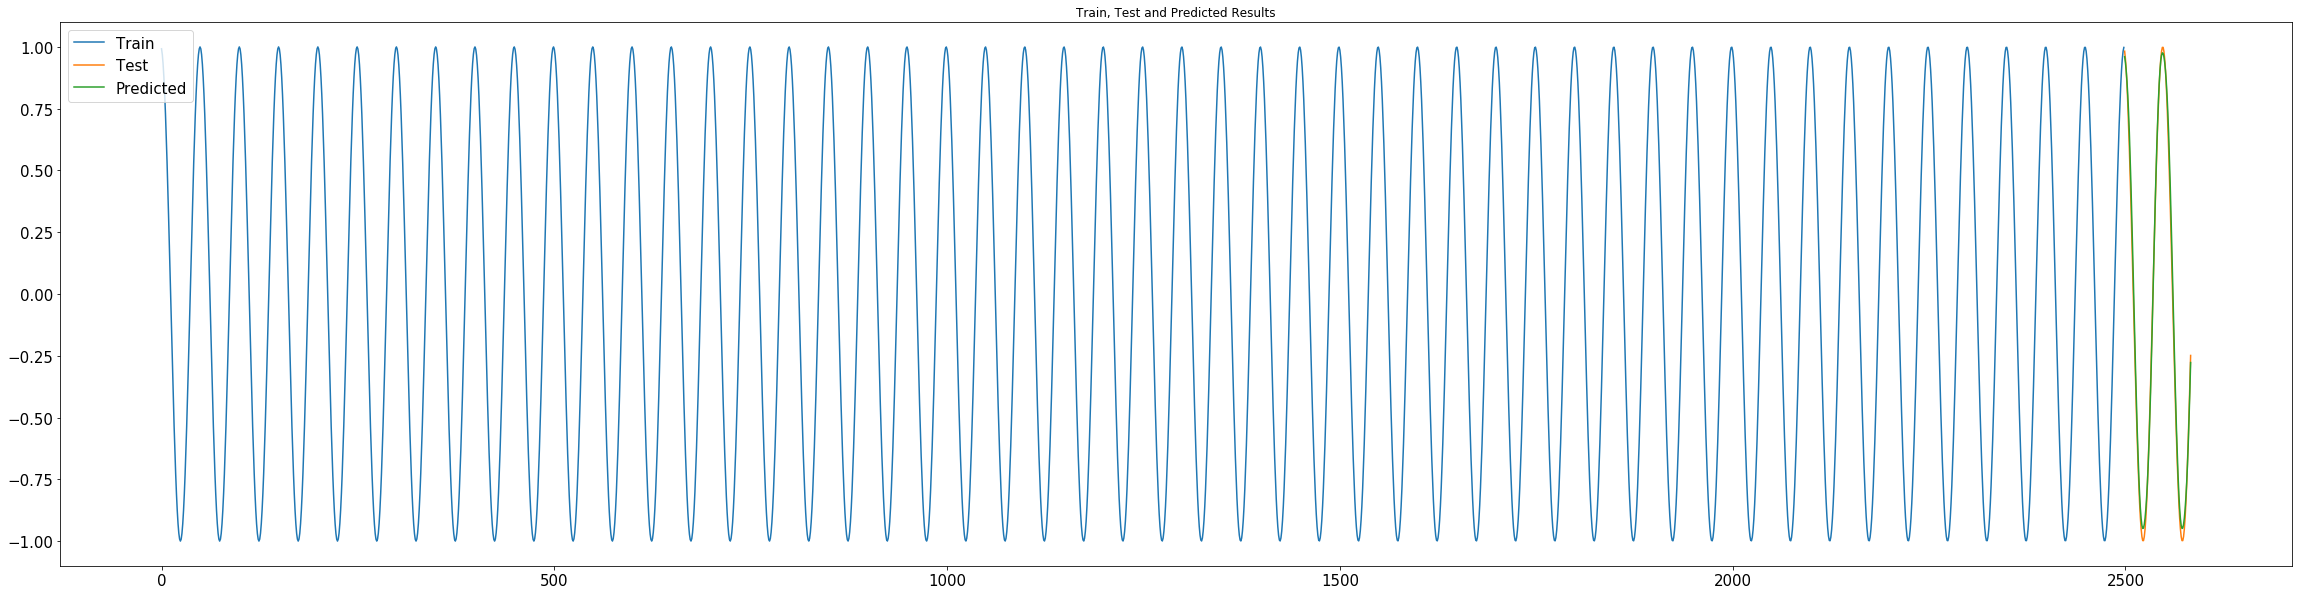

In [330]:
lstm(X_train_2, y_train_2, X_test_2, y_test_2, 10)

### II) learn using the above models the time series with noise: 

LSTM Model contructed with 3 hidden layers of 12 neurons:

Currently fitting the model with the training set with 10  epochs:
Epoch 1/10
75/75 [==============================] - 5s 9ms/step - loss: 0.3343 - mean_absolute_error: 0.5182
Epoch 2/10
75/75 [==============================] - 1s 9ms/step - loss: 0.1356 - mean_absolute_error: 0.3033
Epoch 3/10
75/75 [==============================] - 1s 9ms/step - loss: 0.0471 - mean_absolute_error: 0.1734
Epoch 4/10
75/75 [==============================] - 1s 8ms/step - loss: 0.0379 - mean_absolute_error: 0.1550
Epoch 5/10
75/75 [==============================] - 1s 9ms/step - loss: 0.0338 - mean_absolute_error: 0.1447
Epoch 6/10
75/75 [==============================] - 1s 10ms/step - loss: 0.0300 - mean_absolute_error: 0.1368
Epoch 7/10
75/75 [==============================] - 1s 9ms/step - loss: 0.0294 - mean_absolute_error: 0.1351
Epoch 8/10
75/75 [==============================] - 1s 9ms/step - loss: 0.0272 - mean_absolute_error: 0.1307
E

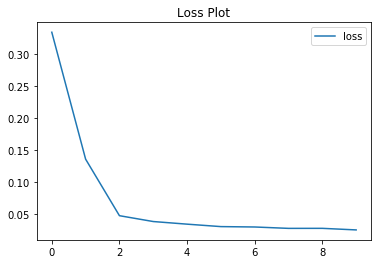

LSTM Model Test MSE: 0.001
LSTM Model Test RMSE: 0.039


/home/redck/.local/lib/python3.8/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


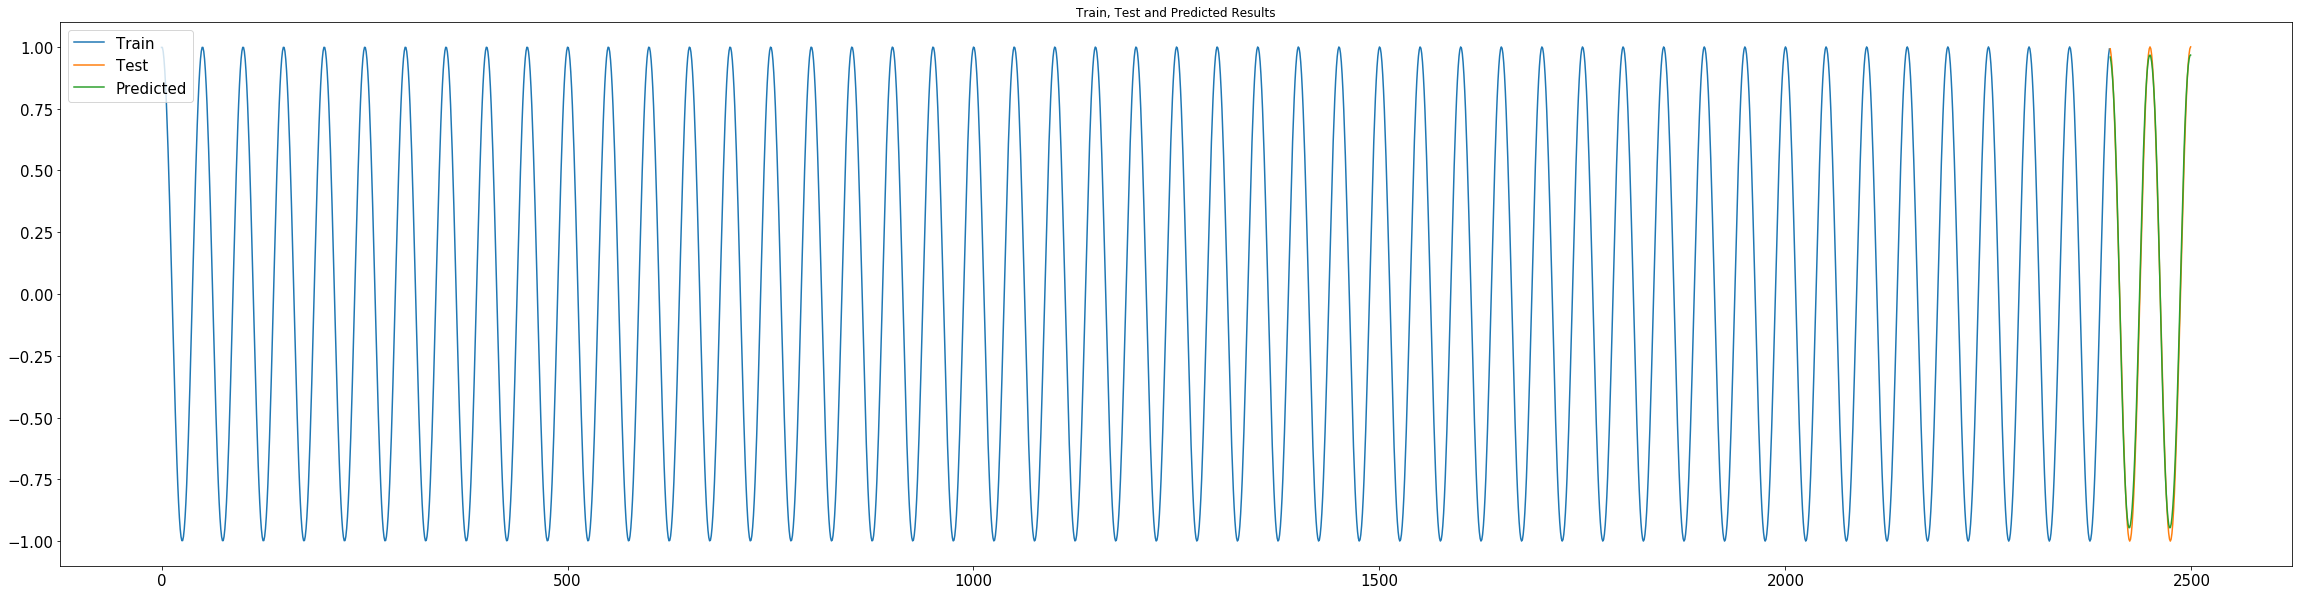

In [ ]:
lstm(X_train_1, y_train_1, X_test_1, y_test_1, 10, True)

LSTM Model contructed with 3 hidden layers of 12 neurons:

Currently fitting the model with the training set with 10  epochs:
Epoch 1/10
79/79 [==============================] - 5s 13ms/step - loss: 0.3548 - mean_absolute_error: 0.5331
Epoch 2/10
79/79 [==============================] - 1s 13ms/step - loss: 0.1207 - mean_absolute_error: 0.2850
Epoch 3/10
79/79 [==============================] - 1s 12ms/step - loss: 0.0459 - mean_absolute_error: 0.1710
Epoch 4/10
79/79 [==============================] - 1s 11ms/step - loss: 0.0369 - mean_absolute_error: 0.1522
Epoch 5/10
79/79 [==============================] - 1s 11ms/step - loss: 0.0334 - mean_absolute_error: 0.1442
Epoch 6/10
79/79 [==============================] - 1s 14ms/step - loss: 0.0319 - mean_absolute_error: 0.1403
Epoch 7/10
79/79 [==============================] - 1s 13ms/step - loss: 0.0302 - mean_absolute_error: 0.1374
Epoch 8/10
79/79 [==============================] - 1s 13ms/step - loss: 0.0274 - mean_absolute_error: 0

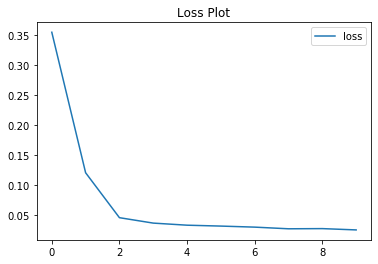

LSTM Model Test MSE: 0.002
LSTM Model Test RMSE: 0.041


/home/redck/.local/lib/python3.8/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


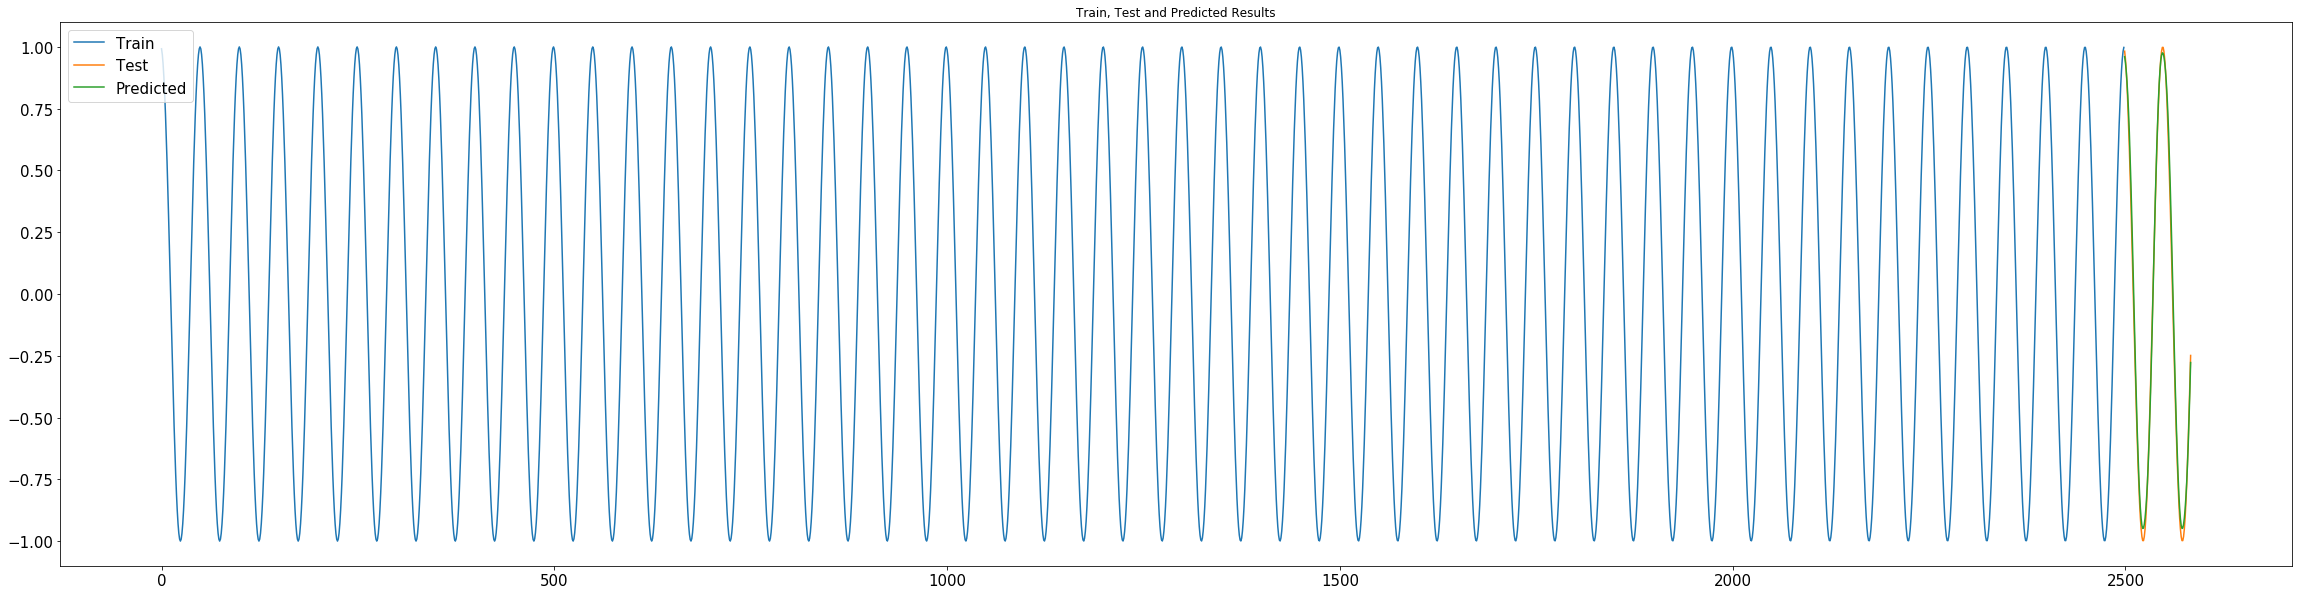

In [ ]:
lstm(X_train_2, y_train_2, X_test_2, y_test_2, True)

### Performance

In [331]:
train_performance = {}
test_performance = {}

train_performance["LSTM"] = lstm_model.evaluate(X_train_1, y_train_1, verbose=0)
test_performance["LSTM"] = lstm_model.evaluate(X_test_1, y_test_1, verbose=0)

print("LSTM Set 1:")
print("Train -->  Loss = ", train_performance["LSTM"][0], "Mean Absolute Error = ", train_performance["LSTM"][1])
print("Test  -->  Loss = ", test_performance["LSTM"][0], "Mean Absolute Error = ", test_performance["LSTM"][1])


LSTM Set 1:
Train -->  Loss =  0.0008275054860860109 Mean Absolute Error =  0.02331417426466942
Test  -->  Loss =  0.0008275442523881793 Mean Absolute Error =  0.023276321589946747


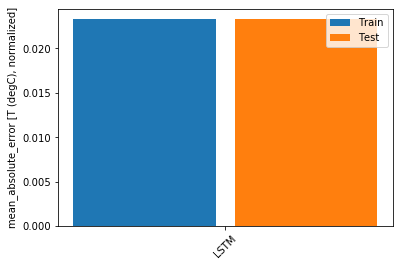

In [332]:
x = np.arange(len(test_performance))
width = 0.3
metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
train_mae = [v[metric_index] for v in train_performance.values()]
test_mae = [v[metric_index] for v in test_performance.values()]

plt.ylabel('mean_absolute_error [T (degC), normalized]', fontsize=10)
plt.bar(x - 0.17, train_mae, width, label='Train')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=test_performance.keys(),
           rotation=45)
           
_ = plt.legend()

### FTLFN Model:

In [333]:
# frame a sequence as a supervised learning problem
def timeseries_to_supervised(data, lag=1):
	df = DataFrame(data)
	columns = [df.shift(i) for i in range(1, lag+1)]
	columns.append(df)
	df = concat(columns, axis=1)
	df = df.drop(0)
	return df
 
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return Series(diff)
 
# scale train and test data to [-1, 1]
def scale(train, test):
	# fit scaler
	scaler = MinMaxScaler(feature_range=(-1, 1))
	scaler = scaler.fit(train)
	# transform train
	train = train.reshape(train.shape[0], train.shape[1])
	train_scaled = scaler.transform(train)
	# transform test
	test = test.reshape(test.shape[0], test.shape[1])
	test_scaled = scaler.transform(test)
	return scaler, train_scaled, test_scaled
 
# inverse scaling for a forecasted value
def invert_scale(scaler, X, yhat):
	new_row = [x for x in X] + [yhat]
	array = np.array(new_row)
	array = array.reshape(1, len(array))
	inverted = scaler.inverse_transform(array)
	return inverted[0, -1]
 
# evaluate the model on a dataset, returns RMSE in transformed units
def evaluate(model, raw_data, scaled_dataset, scaler, offset, batch_size):
	# separate
	X, y = scaled_dataset[:,0:-1], scaled_dataset[:,-1]
	# forecast dataset
	output = model.predict(X, batch_size=batch_size)
	# invert data transforms on forecast
	predictions = list()
	for i in range(len(output)):
		yhat = output[i,0]
		# invert scaling
		yhat = invert_scale(scaler, X[i], yhat)
		# invert differencing
		yhat = yhat + raw_data[i]
		# store forecast
		predictions.append(yhat)
	# report performance
	rmse = sqrt(mean_squared_error(raw_data[1:], predictions))
	return rmse
 
# fit an MLP network to training data
def fit(train, test, raw, scaler, batch_size, nb_epoch, neurons):
	X, y = train[:, 0:-1], train[:, -1]
	# prepare model
	model = Sequential()
	model.add(Dense(neurons, activation='relu', input_dim=X.shape[1]))
	model.add(Dense(1))
	model.compile(loss='mean_squared_error', optimizer='adam')
	# fit model
	train_rmse, test_rmse = list(), list()
	for i in range(nb_epoch):
		model.fit(X, y, epochs=1, batch_size=batch_size, verbose=0, shuffle=False)
		# evaluate model on train data
		raw_train = raw[-(len(train)+len(test)+1):-len(test)]
		train_rmse.append(evaluate(model, raw_train, train, scaler, 0, batch_size))
		# evaluate model on test data
		raw_test = raw[-(len(test)+1):]
		test_rmse.append(evaluate(model, raw_test, test, scaler, 0, batch_size))
	history = DataFrame()
	history['train'], history['test'] = train_rmse, test_rmse
	return history
 
# run diagnostic experiments
def run(series, lag):
	# config
	repeats = 10
	n_batch = 12
	n_epochs = 10
	n_neurons = 20
	diff_values = difference(series, 1)
	# transform data to be supervised learning
	supervised = timeseries_to_supervised(diff_values, lag)
	supervised_values = supervised.values[lag:,:]
	# split data into train and test-sets
	train, test = supervised_values[0:-12], supervised_values[-12:]
	# transform the scale of the data
	scaler, train_scaled, test_scaled = scale(train, test)
	# fit and evaluate model
	train_trimmed = train_scaled[2:, :]
	# run diagnostic tests
	for i in range(repeats):
		history = fit(train_trimmed, test_scaled, raw_values, scaler, n_batch, n_epochs, n_neurons)
		pyplot.plot(history['train'], color='blue')
		pyplot.plot(history['test'], color='orange')
		print('%d) TrainRMSE=%f, TestRMSE=%f' % (i, history['train'].iloc[-1], history['test'].iloc[-1]))
	pyplot.savefig('diagnostic_epochs.png')
 


### II) learn using the above models the time series with noise: 

In [334]:
run(X_train_1, lag)

NameError: name 'Series' is not defined

### I) learn using the above models the time series with no noise: 

## Problem 2

### Creation of a time series for problem 2:

In [ ]:
data = [5,6,3]
X = []
y = []

for i in range(4997):
    out = (0.6*data[i+2]) + (-0.54*data[i+1]) + (-0.44*data[i]) #+ 0.01 (U)
    data.append(out)

print(len(data))

for i in range(lag, 4999):
   X.append(data[i-lag:i])
   y.append(data[i])

X = np.expand_dims(X, axis = 2)

print(len(X))

X_train_1 = X[:2400]
y_train_1 = y[:2400]
X_test_1  = X[2401:2501]
y_test_1  = y[2401:2501]

X_train_2 = X[2401:4900]
y_train_2 = y[2401:4900]
X_test_2  = X[4901:-1]
y_test_2  = y[4901:-1]


5000
4987
